# 1. Angajati

In [31]:
import pandas as pd
import numpy as np

In [32]:
url = 'https://raw.githubusercontent.com/lauradiosan/AI-UBB/main/2023-2024/labs/lab02/data/employees.csv'

In [33]:
df_employees = pd.read_csv(url)
print(df_employees)

    First Name  Gender  Start Date Last Login Time  Salary  Bonus %  \
0      Douglas    Male    8/6/1993        12:42 PM   97308    6.945   
1       Thomas    Male   3/31/1996         6:53 AM   61933    4.170   
2        Maria  Female   4/23/1993        11:17 AM  130590   11.858   
3        Jerry    Male    3/4/2005         1:00 PM  138705    9.340   
4        Larry    Male   1/24/1998         4:47 PM  101004    1.389   
..         ...     ...         ...             ...     ...      ...   
995      Henry     NaN  11/23/2014         6:09 AM  132483   16.655   
996    Phillip    Male   1/31/1984         6:30 AM   42392   19.675   
997    Russell    Male   5/20/2013        12:39 PM   96914    1.421   
998      Larry    Male   4/20/2013         4:45 PM   60500   11.985   
999     Albert    Male   5/15/2012         6:24 PM  129949   10.169   

    Senior Management                  Team  
0                True             Marketing  
1                True                   NaN  
2        

- numarul de angajati




In [34]:
nr_employees = len(df_employees)
print(f"Numarul de angajati: {nr_employees}")

Numarul de angajati: 1000


- numar si tipul informatiilor (proprietatilor) detinute pentru un angajat

In [35]:
print(f"Numarul informatiilor detinute pentru un angajat: {len(df_employees.columns)}")
print(f"Informatiile detinute despre un angajat: {df_employees.columns.values}")

Numarul informatiilor detinute pentru un angajat: 8
Informatiile detinute despre un angajat: ['First Name' 'Gender' 'Start Date' 'Last Login Time' 'Salary' 'Bonus %'
 'Senior Management' 'Team']


- numarul de angajati pentru care se detin date complete

In [36]:
employees = df_employees.dropna(axis=0, how='any')
print(f"Numarul de angajati cu date complete: {len(employees)}")

Numarul de angajati cu date complete: 764


- valorile minime, maxime, medii pentru fiecare proprietate

In [37]:
for series_name, series in df_employees.items():
  try:
    print(f"{series_name}: min => {min(series)}, max => {max(series)}, avg => {series.mean()}")
  except:
    pass

Salary: min => 35013, max => 149908, avg => 90662.181
Bonus %: min => 1.015, max => 19.944, avg => 10.207555000000001
Senior Management: min => False, max => True, avg => 0.5016077170418006


- in cazul proprietatilor nenumerice, cate valori posibile are fiecare astfel de proprietate

In [38]:
for series_name, series in df_employees.items():
  print(f"{series_name}: {len(pd.unique(series))}")

First Name: 201
Gender: 3
Start Date: 972
Last Login Time: 720
Salary: 995
Bonus %: 971
Senior Management: 3
Team: 11


- daca sunt valori lipsa si cum se poate rezolva aceasta problema

In [39]:
new_df_employees = df_employees
for series_name, series in new_df_employees.items():
  new_df_employees[series_name].fillna("NaN", inplace=True)

print(f"(*Acum) Numarul de angajati cu date complete: {len(new_df_employees.dropna(axis=0, how='any'))}")


(*Acum) Numarul de angajati cu date complete: 1000


- vizualizare a distributiei salariilor angajatilor pe categorii de salariu.

/tmp/ipykernel_43269/3052497465.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


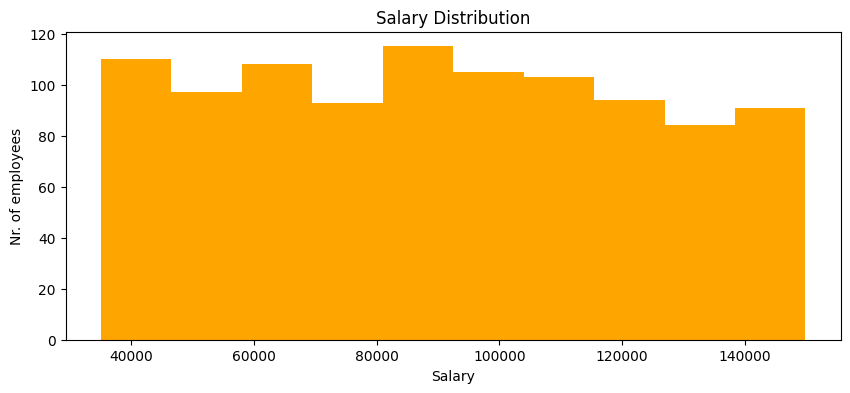

In [40]:
from matplotlib import pyplot as plt

salary_data = df_employees["Salary"]

fig = plt.figure(figsize=(10,4))

plt.hist(salary_data, color="orange")

plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Nr. of employees")

fig.show()

- distributia salariilor acestor angajati pe categorii de salar si echipa din care fac parte

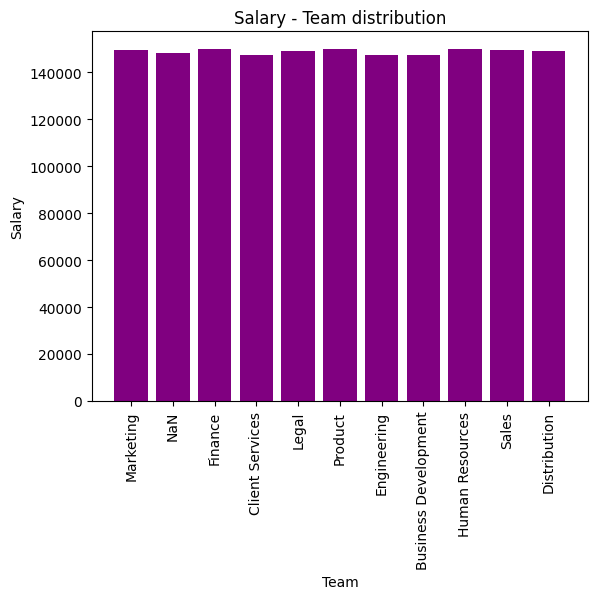

In [41]:
plt.bar(x=df_employees["Team"], height=df_employees["Salary"], color='purple')
plt.title("Salary - Team distribution")
plt.xlabel("Team")
plt.ylabel("Salary")
plt.xticks(rotation=90)
plt.show()

- angajati ce pot fi considerati "outlieri"



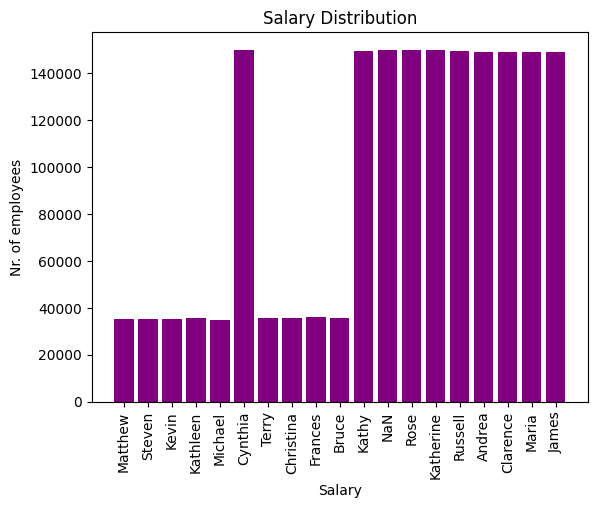

In [42]:
q01 = df_employees["Salary"].quantile(0.01)
q03 = df_employees["Salary"].quantile(0.99)

col1 = df_employees[df_employees["Salary"]<q01]
col2 = df_employees[df_employees["Salary"]>q03]

col = pd.concat([col1, col2])
# print(col)

plt.bar(x=col["First Name"], height=col["Salary"], color='purple')

plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Nr. of employees")
plt.xticks(rotation = 90)

plt.show()

# 2. Imagini


In [2]:
from PIL import Image
from IPython.display import display

- sa se vizualizeze una din imagini

# 3. Propozitii

In [ ]:
!wget https://raw.githubusercontent.com/lauradiosan/AI-UBB/main/2023-2024/labs/lab02/data/texts.txt

--2024-03-12 17:42:48--  https://raw.githubusercontent.com/lauradiosan/AI-UBB/main/2023-2024/labs/lab02/data/texts.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1095 (1.1K) [text/plain]
Saving to: ‘texts.txt’

texts.txt           100%[===================>]   1.07K  --.-KB/s    in 0s      

2024-03-12 17:42:48 (69.7 MB/s) - ‘texts.txt’ saved [1095/1095]



In [43]:
from PIL import Image

- sa se vizualizeze una din imagini

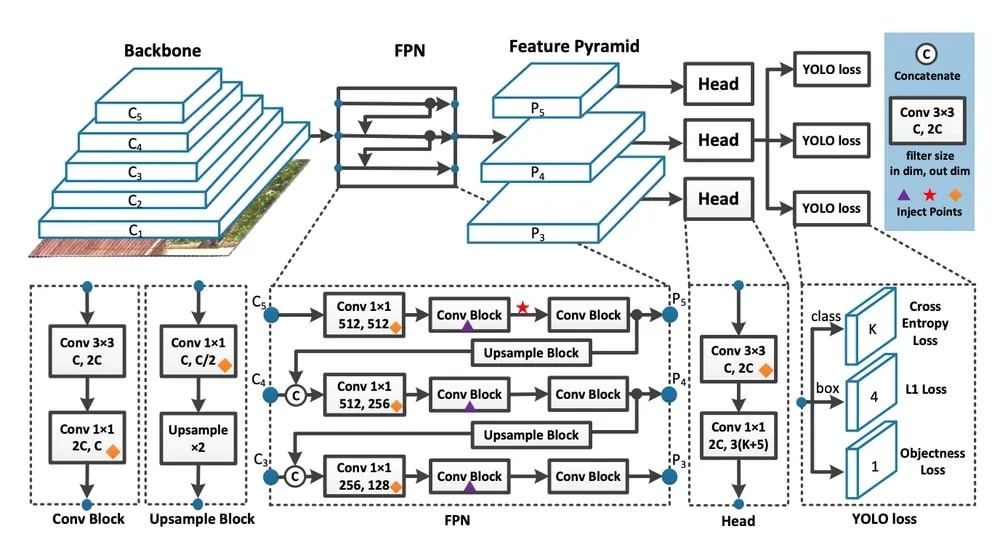

In [49]:
image = Image.open('images/YOLO.jpg')
display(image)

- daca imaginile nu aceeasi dimensiune, sa se redimensioneze toate la 128 x 128 pixeli si sa se vizualizeze imaginile intr-un cadru tabelar.

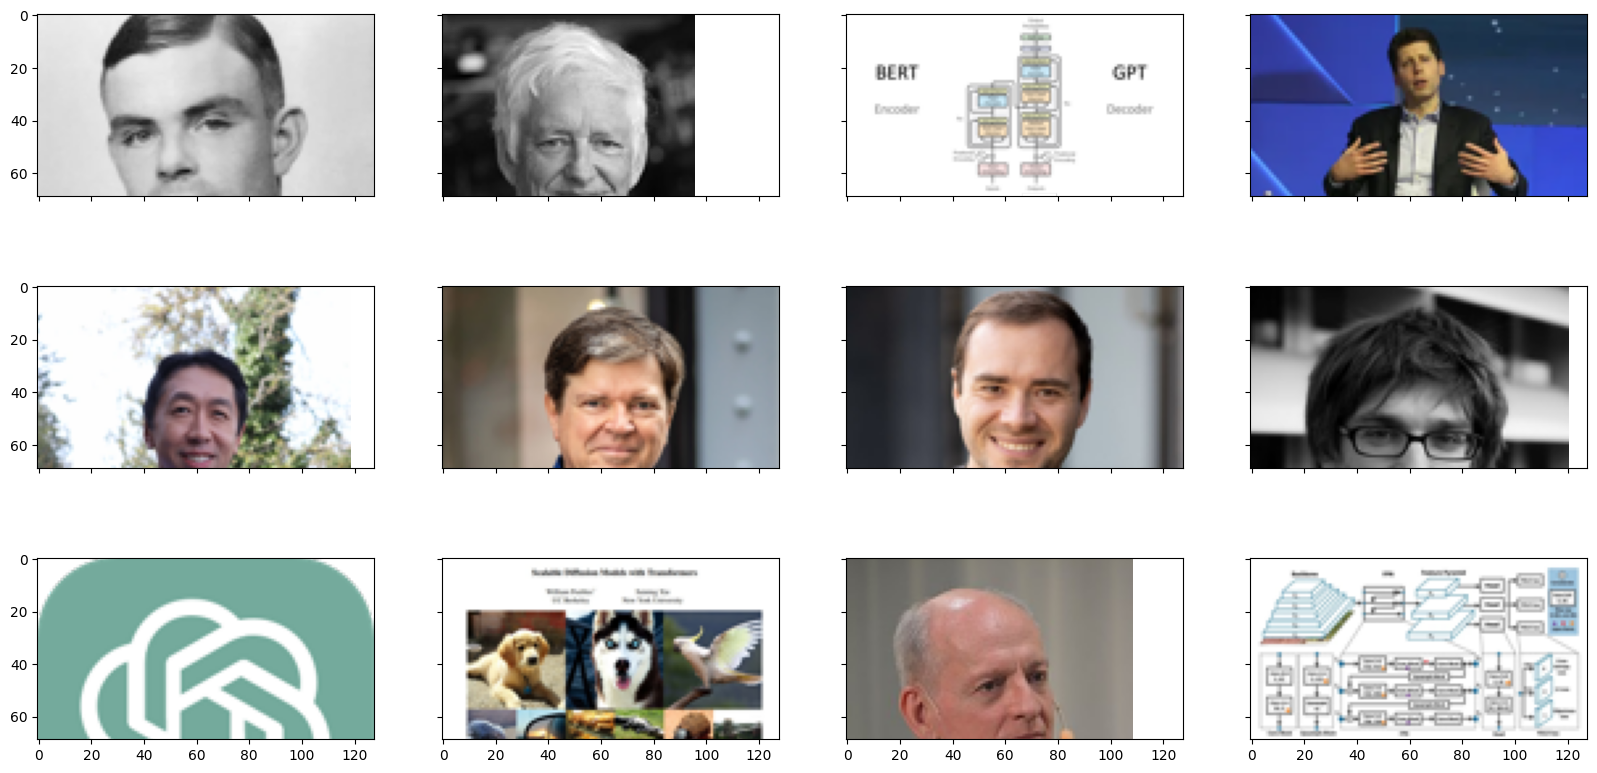

In [85]:
import glob

file_type = "*"
src_folder = "images/"

image_folder = glob.glob(src_folder + file_type)

fig, ax = plt.subplots(3, 4, figsize=(20, 10), sharex=True, sharey=True)

i = 0
j = 0

for image in image_folder:
    image = Image.open(image)
    image.thumbnail((128, 128))
    ax[j][i].imshow(image, cmap=plt.cm.gray)
    j+=1
    if j % 3 == 0: 
        i += 1
        j = 0


- sa se transforme imaginile in format gray-levels si sa se vizualizeze

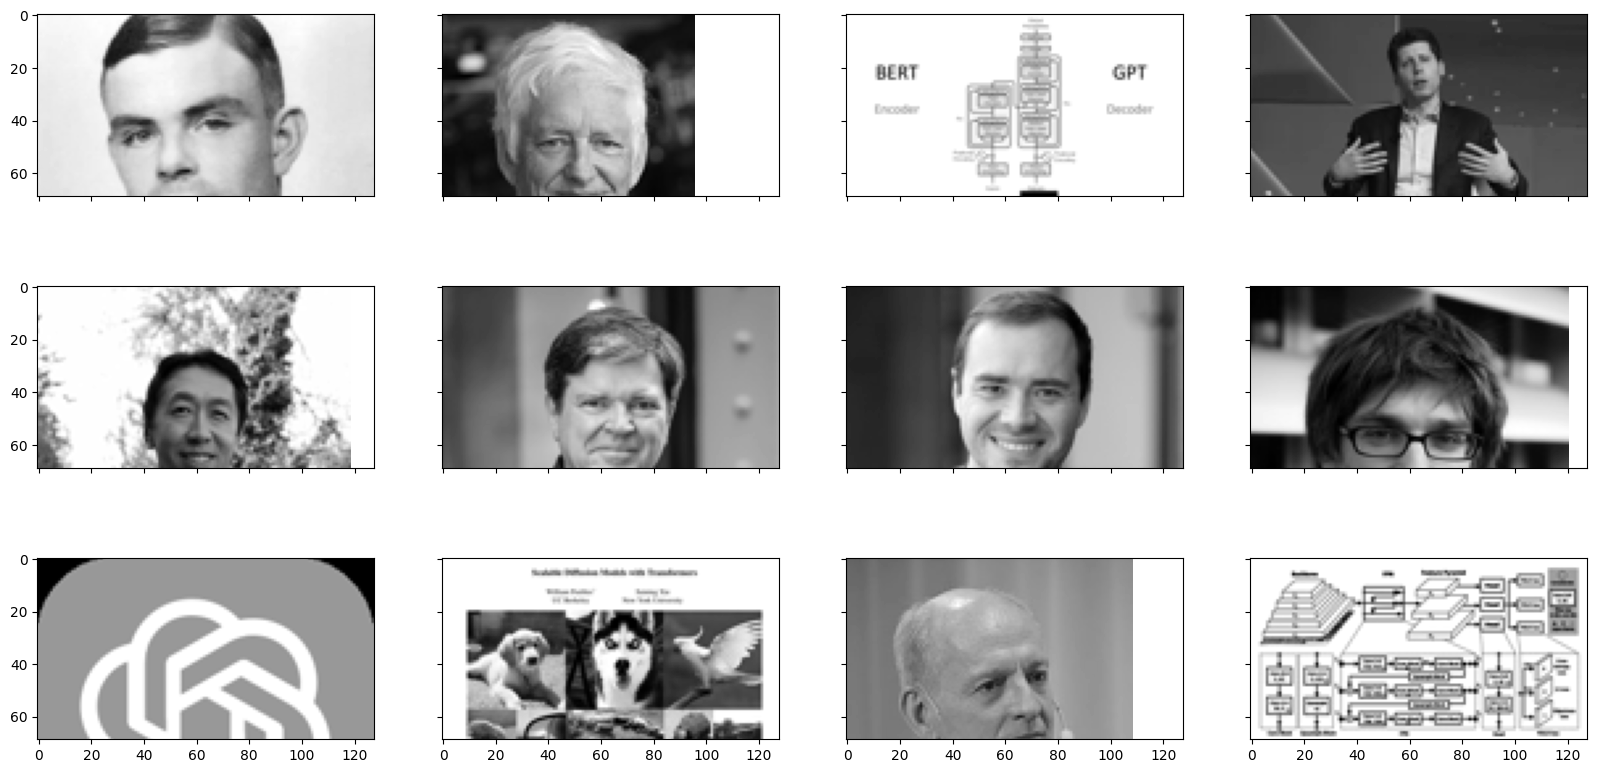

In [87]:
i = 0
j = 0

fig, ax = plt.subplots(3, 4, figsize=(20, 10), sharex=True, sharey=True)

for image in image_folder:
    image = Image.open(image).convert('L')
    image.thumbnail((128, 128))
    ax[j][i].imshow(image, cmap=plt.cm.gray)
    j+=1
    if j % 3 == 0: 
        i += 1
        j = 0
        


- sa se blureze o imagine si sa se afiseze in format "before-after"

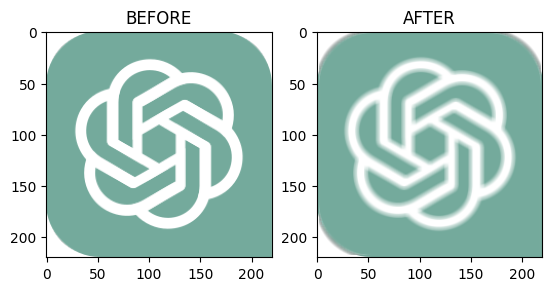

In [96]:
from PIL import ImageFilter

image_to_blur = Image.open("images/chatGPT.png")
blurred_image = image_to_blur.filter(ImageFilter.BLUR)

fix, ax = plt.subplots(1, 2)
ax[0].title.set_text("BEFORE")
ax[0].imshow(image_to_blur)
ax[1].title.set_text("AFTER")
ax[1].imshow(blurred_image)

- sa se identifice muchiile ontr-o imagine si sa se afiseze in format "before-after"

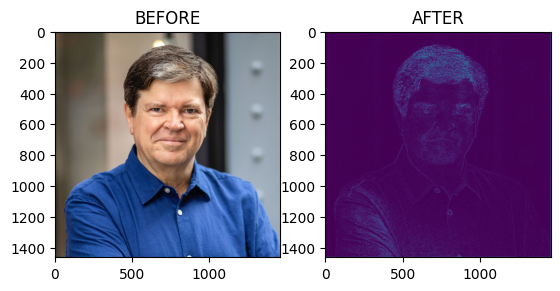

In [97]:
image = Image.open("images/LeCun.jpg")
image_find_edges = image.convert("L").filter(ImageFilter.FIND_EDGES)

fix, ax = plt.subplots(1, 2)
ax[0].title.set_text("BEFORE")
ax[0].imshow(image)
ax[1].title.set_text("AFTER")
ax[1].imshow(image_find_edges)

# 3. Propozitii

In [100]:
%pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [101]:
import nltk

file1 = open("texts.txt", "r")
text = file1.read()
print(text)

nltk.download('punkt')

Mesaj de informare: 
Cursul și laboratoarele de Inteligență Artificială vor fi o 
provocare pentru toți. Suntem convinși că veți realiza proiecte 
foarte interesante. Vă încurajăm să adresați întrebări atunci 
când ceva nu e clar, atât în mod live, cât și folosind platforma 
Teams, canalul ”general”. 
Dacă ați citit până aici, vă rugăm să lăsați un mesaj pe canalul 
general cu textul ”Am citit textul pentru problema 3”. 
Mesaj de informare generat de ChatGPT:
Stimați cursanți,
Suntem încântați să vă avem în echipa noastră pentru Cursul și 
laboratoarele de Inteligență Artificială. Această experiență va 
fi o adevărată provocare, dar suntem convinși că veți realiza 
proiecte extrem de interesante.
Vă încurajăm să fiți activi și să adresați întrebări atunci când 
ceva nu este clar. Fie că este vorba de o discuție în timp real 
sau prin intermediul platformei Teams, canalul ”general”, suntem 
aici să vă sprijinim.
Succes și să înceapă aventura AI!
Cu considerație, Echipa de Inteligență Ar

[nltk_data] Downloading package punkt to /home/albert/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

- numarul de propozitii din text;

In [102]:
from nltk.tokenize import sent_tokenize

sentences = sent_tokenize(text)
nr_sentences = len(sentences)

print(f"Numarul de propozitii: {nr_sentences}")

Numarul de propozitii: 10


- numarul de cuvinte din text

In [103]:
from nltk.tokenize import word_tokenize

words = word_tokenize(text)
nr_words = len(words)

print(f"Numarul de cuvinte: {nr_words}")

Numarul de cuvinte: 182


- numarul de cuvinte diferite din text

In [104]:
unique_words = set(words)
print(f"Numarul cuvintelor diferite: {len(unique_words)}")

Numarul cuvintelor diferite: 99


- cel mai scurt si cel mai lung cuvant (cuvinte)

In [105]:
import pandas
from nltk.probability import FreqDist

# text_tokens = nltk.word_tokenize(text)
# text = nltk.Text(text_tokens)
text_series = pandas.Series(text)
text_frequencies = FreqDist(text)
text_frequency_frame = pandas.DataFrame(text_frequencies.most_common(), columns=["token", "frequency"])

max_length = max(text_frequency_frame.token.str.len())
longest = text_frequency_frame.token.str.extractall("(?P<long>.{{{}}})".format(max_length))

# min_length = min(text_frequency_frame.token.str.len())
# shortest = text_frequency_frame.token.str.extractall("(?P<short>.{{{}}})".format(min_length))

# print(f"Shortest: {shortest}")
print(f"Longest: {longest.long.iloc[0]}")

Longest:  


- textul fara diacritice

- sinonimele celui mai lung cuvant din text